# Breast Cancer Diagnosis Classification

##  Table of Contents
1. [Introduction](#introduction)
2. [Objective](#objective)
3. [Problem Analysis: Machine Learning Requirements](#problem-analysis-machine-learning-requirements)
4. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
    1. [About the Data and Initial Data Cleaning](#about-the-data-and-initial-data-cleaning)
    2. [Data Distribution Analysis](#data-distribution-analysis)
    3. [Correlations Analysis](#correlations-analysis)
    4. [Missing Values Analysis](#missing-values-analysis)
    5. [Outlier Analysis](#outlier-analysis)
    6. [Final Data Cleaning](#final-data-cleaning)
5. [References](#references)

## Introduction 
In this project, we will try to find, analyze, and create an unsupervised machine-learning model to solve a problem. The data we will be using will be the Breast Cancer Wisconsin (Diagnostic) Data Set, this further adds to how supervised models can assist in medical problems. 

The data, a comprehensive collection of features for each sample, was meticulously gathered from images of FNA (Fine Needle Aspiration) of breast masses at the University of Wisconsin Hospital, Madison, by Dr. William H. Wolberg. This valuable dataset is publicly available on the reputable UCI Machine Learning Repository and Kaggle [label](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data). Please check the [references](#references) for more information on the dataset.

## Objective
The goal of this project will be to classify breast cancer diagnoses as benign or malignant using the features given in the dataset. Throughout this project, we will explore Exploratory Data Analysis (EDA), data cleaning, model training and evaluation of the said model to achieve optimal classification performance. 

## Problem Analysis: Machine Learning Requirements
Our objective leads us to believe we must use a binary classification to find what is malignant and benign. For this project, we will create multiple machine-learning models such as logistic regression, decision trees, random forests and support vector machines. 

## Exploratory Data Analysis (EDA)

### About the Data and Initial Data Cleaning
The Breast Cancer Wisconsin (Diagnostic) dataset comprises 569 entries and 33 columns. The dataset features 31 numerical columns detailing measurements such as `radius_mean`, `texture_mean`, and `area_mean`, alongside `diagnosis` (target variable) and an `id` column. Summary statistics reveal that features like `radius_mean` and `area_mean` show significant variability, indicated by their high standard deviations. The dataset contains no missing values, except for `Unnamed: 32`, which has no data and can be disregarded. Most datatypes are of float64, except for id, which is of int64 and may have to be changed to a object variable. Additionally, we must change `diagnosis` to a categorical variable of (1,0) for malignant and benign respectively.

### Data Distribution Analysis

![Missing distributions.png](./distributions.png "Distributions")

When looking at our general observations, we notice that most of our features are right-skewed, meaning that most of the data points are concentrated on the left side, with a long tail extending to the right. However, a few features, such as `exture_mean`, `symmetry_mean`, and `fractal_dimension_mean`, appear to have a more symmetric or slightly left-skewed distribution.

Additionally, when looking at `radius_mean`, `texture_mean`, `perimeter_mean`, and area_mean (crucial for determining the size of the cell nuclei), they show a right-skewed distribution, meaning there are fewer large nuclei. 

We also find that `smoothness_mean`, `compactness_mean`, `concavity_mean`, and `concave_points_mean` (which describe the shape of the nuclei) are right-skewed. 

However when it comes to `symmetry_mean`, `fractal_dimension_mean` we find that they are more symmetrically distributed compared to the others, which shows us that there is a balacned distribution of symmetry and complexity in the cell nuclei. 

Additionally, these features are generally right-skewed, indicating variability within the measurements. 

### Correlations Analysis
We begin by analyzing the relationships between various features and the target variable `diagnosis`.

![Missing corelations.png](./corelations.png "Corelations")

The matrix highlights that features such as `concave points_mean` (0.78), `area_mean` (0.74), `radius_mean` (0.73), and `perimeter_mean` (0.74) have strong positive correlations with the `diagnosis,` indicating that higher values of these features are associated with malignant tumours. Conversely, features such as `fractal_dimension_mean` (-0.013) and `fractal_dimension_se` (-0.0065) show very weak or negligible correlations with `diagnosis`, suggesting limited predictive value.

Additionally, features representing the "worst" values of measurements, such as `concave points_worst` (0.79), `area_worst` (0.73), and `radius_worst` (0.78), also exhibit strong correlations with the target variable, reaffirming their importance in predicting malignancy. These insights suggest that features related to the size and shape of cell nuclei, particularly those involving area and concavity measurements, are critical for distinguishing between malignant and benign breast tumours. This correlation analysis will guide feature selection and engineering in subsequent modelling steps to enhance the predictive accuracy of the classification models.

### Missing Values Analysis
The dataset contains no missing values, except for the `Unnamed: 32` column, which has no data and can be disregarded. This indicates that the dataset is complete and does not require imputation or handling of missing values.

### Outlier Analysis

![Missing outliers.png](./outliers.png "Outliers")

The leverage versus normalized residuals squared plot identifies influential data points within the dataset. Observations like those at indices 152, 212, 38, and 297 display high leverage and large normalized residuals squared, indicating they are significant outliers. These points have extreme predictor values and substantial deviation from the fitted model, potentially exerting a disproportionate influence on the model's outcomes. The threshold for identifying outliers that we will be using is $2p/n$, where p is the number of predictors and n is the number of observations.

By identifying and managing these outliers, we can enhance the reliability and interpretability of our classification model. Additionally, our outliers are `0,   3,   9,  12,  28,  31,  38,  42,  68,  71,  78,  83,  87, 108, 112, 116, 122, 138, 152, 180, 190, 192, 202, 212, 213, 239, 252, 256, 258, 265, 288, 290, 314, 318, 352, 368, 376, 379, 400, 461, 504, 505, 528, 539, 561, 562, 567, 568`.

### Final Data Cleaning 
We have now dropped all our outliers and finally have a clean dataset to work with.

** Below is the code for this section ** 

In [1]:
# First 5 rows of our data with all the features listed
import pandas as pd
import numpy as np

data = pd.read_csv('data.csv')
print("Features", data.drop(columns=["diagnosis"]).columns)
data.head()

Features Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
# We display all the features and our target with its data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
# This section describes our data statistically
data.describe()
print(data.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

In [4]:
# Initial data cleaning
data.drop(columns=['Unnamed: 32'], inplace=True, errors='ignore')

data['id'] = data['id'].astype('object')
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
data['diagnosis'] = data['diagnosis'].astype('category')

data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


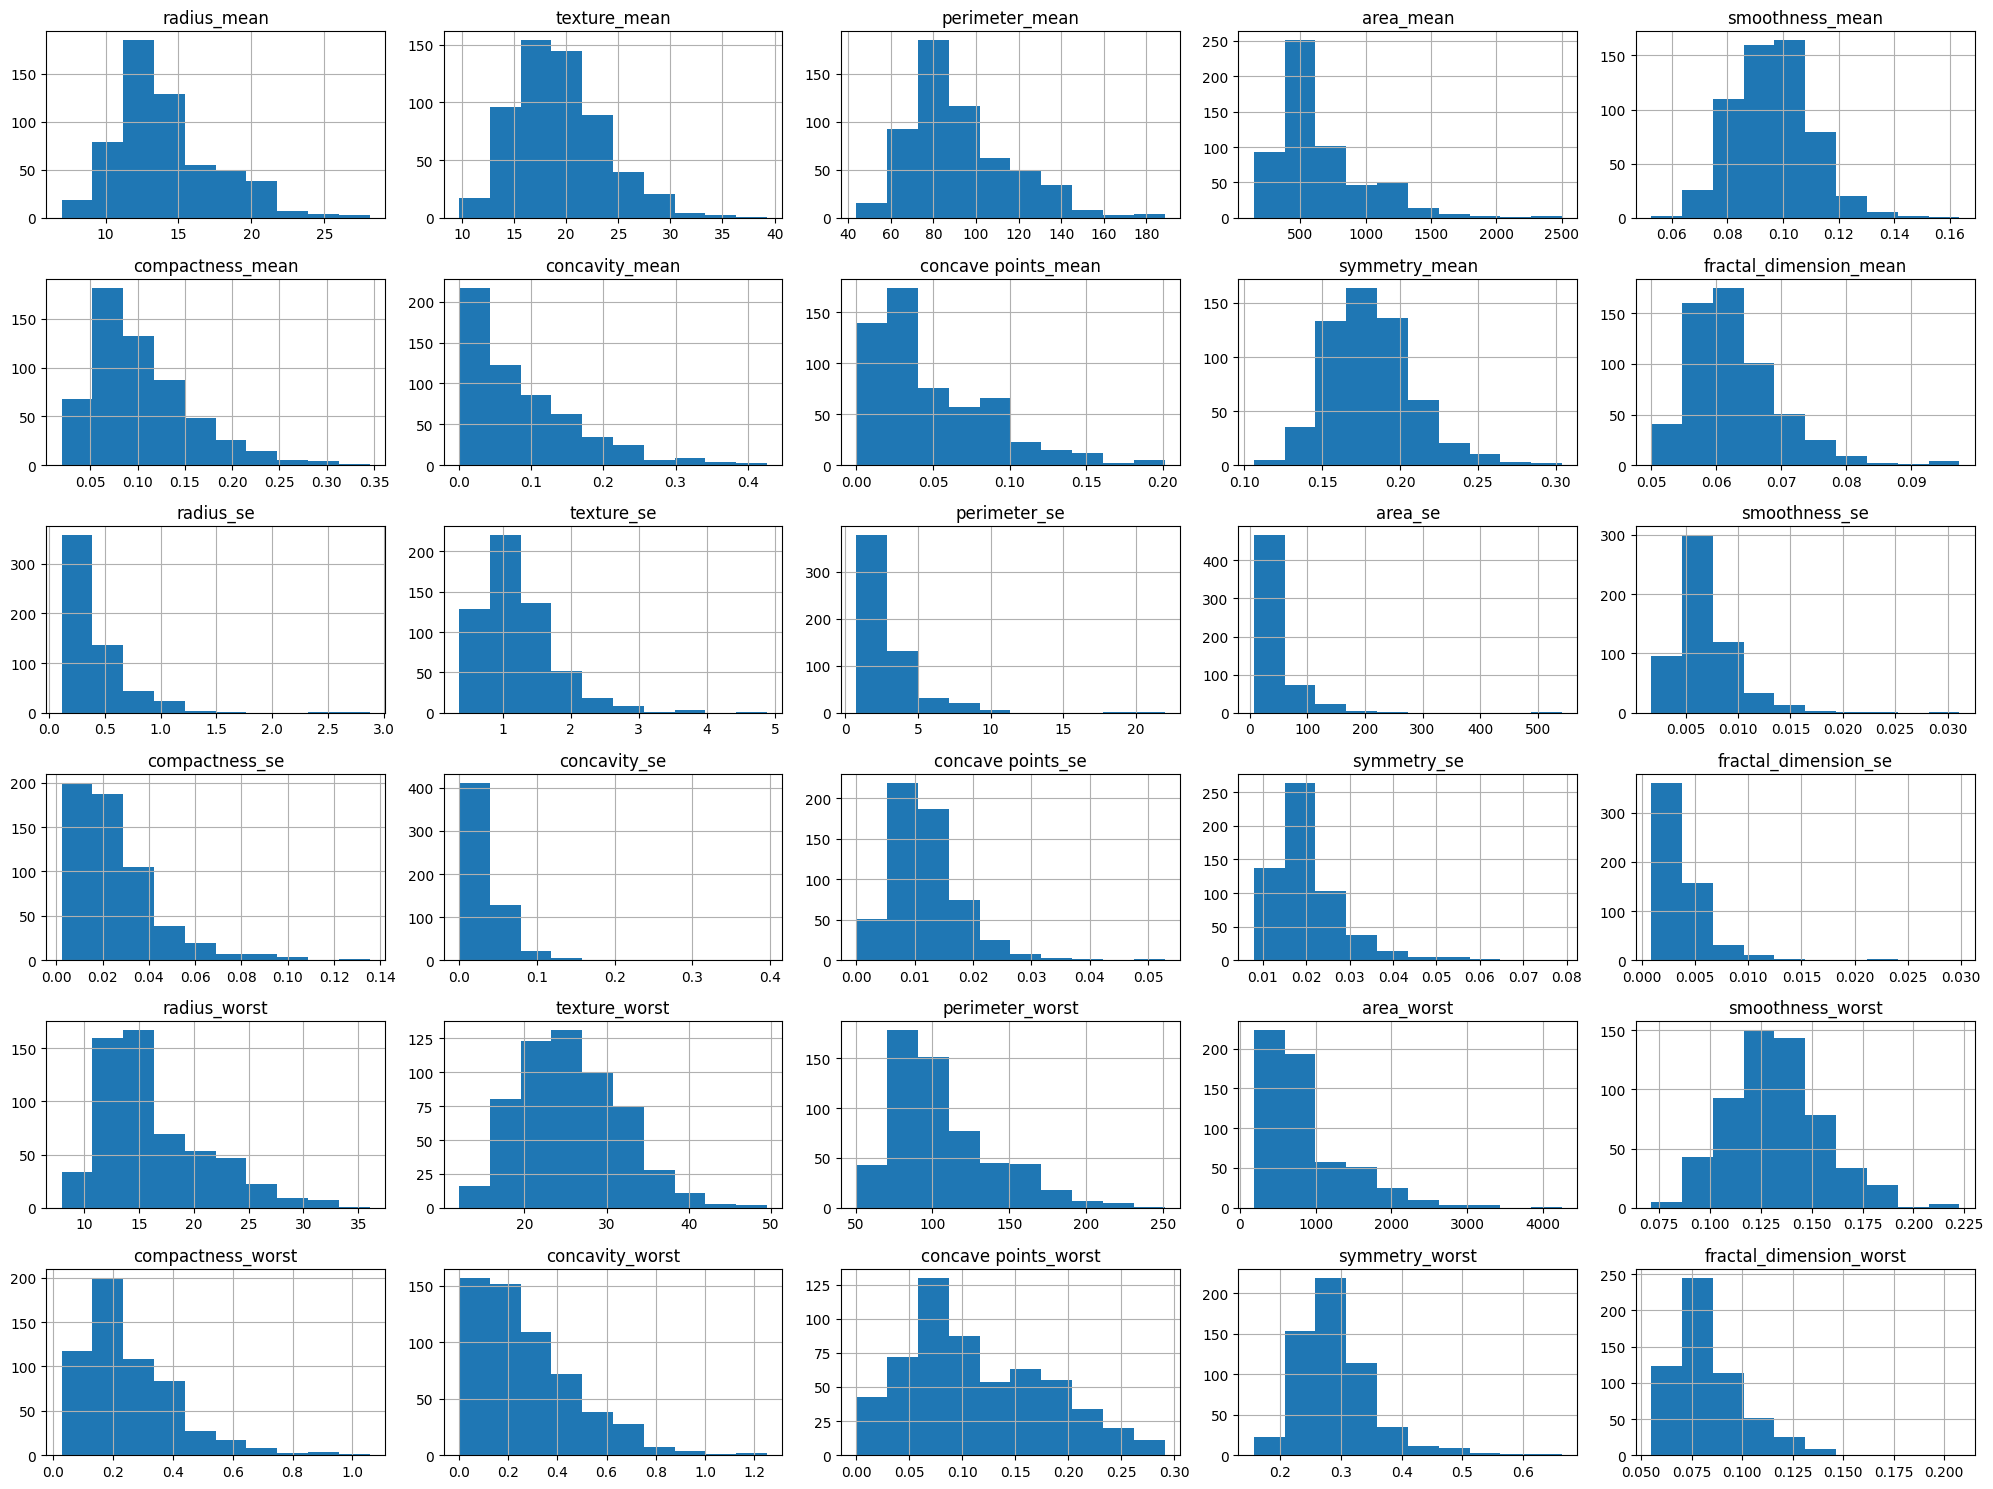

In [5]:
# Distribution of our features

import matplotlib.pyplot as plt
import seaborn as sns

data.hist(figsize=(20, 15))
plt.tight_layout()
plt.show()

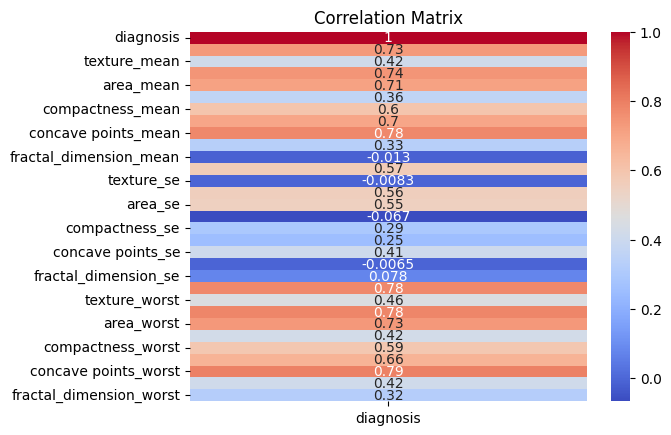

In [6]:
# Correlation
correlation_matrix = data.drop(columns=["id"]).corr()

sns.heatmap(correlation_matrix[['diagnosis']], annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [7]:
# Missing values check 

missing_values = data.isnull().sum()
print(missing_values)

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


Outliers based on leverage: [  0   3   9  12  28  31  38  42  68  71  78  83  87 108 112 116 122 138
 152 180 190 192 202 212 213 239 252 256 258 265 288 290 314 318 352 368
 376 379 400 461 504 505 528 539 561 562 567 568]


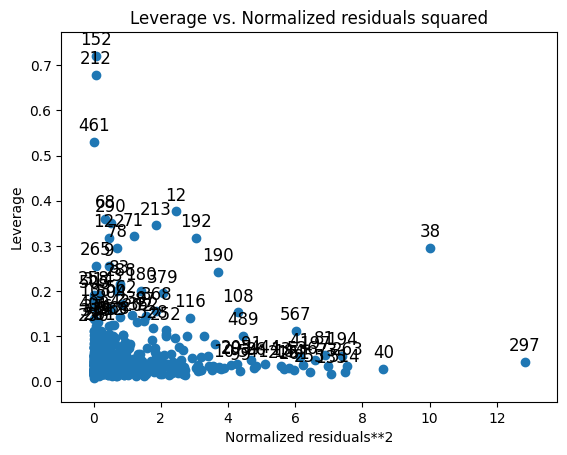

In [8]:
# Outlier Analysis
from statsmodels.api import OLS, add_constant, graphics

X = data.drop(columns=['diagnosis',"id"])  
X = X.apply(pd.to_numeric, errors='coerce')

X = add_constant(X)
y = data['diagnosis']


model = OLS(y, X).fit()
influence = model.get_influence()
leverage = influence.hat_matrix_diag

graphics.plot_leverage_resid2(model)

threshold = 2 * X.shape[1] / X.shape[0]
outliers = np.where(leverage > threshold)[0]
print("Outliers based on leverage:", outliers)

In [9]:
# Data Cleaning 
data_clean = data.drop(index=outliers, axis=0)
data_clean.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.00000,521.000000,521.000000,521.000000,...,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000
mean,13.971914,19.067946,90.706468,634.734549,0.095459,0.097477,0.07828,0.045168,0.179019,0.062039,...,16.030860,25.455873,105.303628,846.060461,0.131521,0.238588,0.249867,0.109854,0.287131,0.082353
std,3.210221,4.102994,21.973429,308.864833,0.013053,0.044348,0.06604,0.034771,0.025114,0.005849,...,4.419204,5.914295,30.338195,499.897091,0.021553,0.134103,0.178326,0.061617,0.054884,0.015458
min,6.981000,9.710000,43.790000,143.500000,0.062510,0.019380,0.00000,0.000000,0.116700,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.081250,0.034320,0.000000,0.000000,0.171200,0.055210
25%,11.740000,16.070000,75.270000,422.900000,0.085460,0.062900,0.02819,0.019670,0.161500,0.057630,...,13.050000,20.980000,84.350000,516.400000,0.116200,0.142100,0.108700,0.063430,0.250200,0.071150
50%,13.270000,18.680000,85.840000,541.800000,0.094950,0.087110,0.05500,0.031420,0.177900,0.061290,...,14.840000,25.260000,97.110000,675.200000,0.131100,0.205300,0.209000,0.095940,0.280600,0.079190
75%,15.500000,21.580000,102.500000,747.200000,0.104100,0.124800,0.11280,0.065560,0.193700,0.065660,...,18.070000,29.250000,122.100000,993.600000,0.144600,0.312400,0.366200,0.154100,0.315300,0.090600
max,25.220000,33.810000,171.500000,1878.000000,0.139800,0.283200,0.33390,0.184500,0.304000,0.082610,...,31.010000,49.540000,211.700000,2944.000000,0.222600,0.772500,0.901900,0.290300,0.577400,0.148600


## References: 
UCI Machine Learning & Collaborator. (2015). Breast Cancer Wisconsin (Diagnostic) Data Set. Kaggle. Retrieved [2024], from https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

Wolberg, W., Mangasarian, O., Street, N., & Street, W. (1995). Breast Cancer Wisconsin (Diagnostic) [Data set]. UCI Machine Learning Repository. https://doi.org/10.24432/C5DW2B 

----------------------------------------------------------------------------------------------------------------------------

© Karan D 2024